### Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import string

In [22]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [23]:
from gensim.models.wrappers import LdaMallet
import os


mallet_path = 'C:\\Users\\prash\\Downloads\\mallet-2.0.8\\bin\\mallet'

os.environ['MALLET_HOME'] = 'C:\\Users\\prash\\Downloads\\mallet-2.0.8\\'

### Import News Dataset

In [24]:
df1 = list(np.array(pd.read_csv('news_dataset_jan.csv',index_col = 0)))
df2 = list(np.array(pd.read_csv('news_dataset_feb.csv',index_col = 0)))
df3 = list(np.array(pd.read_csv('news_dataset_mar.csv',index_col = 0)))
df4 = list(np.array(pd.read_csv('news_dataset_apr.csv',index_col = 0)))
df5 = list(np.array(pd.read_csv('news_dataset_may.csv',index_col = 0)))
df6 = list(np.array(pd.read_csv('news_dataset_jun.csv',index_col = 0)))
df7_8 = list(np.array(pd.read_csv('news_dataset_jul_aug.csv',index_col = 0)))
df_9 = list(np.array(pd.read_csv('news_dataset_sep.csv',index_col = 0)))
df_10_11_12 = list(np.array(pd.read_csv('news_dataset_oct_nov_dec.csv',index_col = 0)))

df_1_2 = list(np.array(pd.read_csv('news_dataset_jan_feb.csv',index_col = 0)))

In [25]:
df = pd.DataFrame(df1 + df2 + df3 + df4 + df5 + df6 + df7_8 + df_9 + df_10_11_12 + df_1_2)

In [26]:
df = df.drop_duplicates()

In [27]:
#df = pd.read_csv('news_dataset_feb.csv',index_col = 0)

print(df.shape)

df.head(5)

(28637, 4)


,0,1,2,3
0,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Banking system get...,Banks showed an overall improvement with their...,https://www.business-standard.com/article/fina...
1,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Fractured mandate ...,Corporate bosses to invest more in new year; e...,https://www.business-standard.com/article/elec...
2,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Brands must step o...,The trend has been mostly to create fewer and ...,https://www.business-standard.com/article/comp...
3,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Realty developers ...,"A slew of measures such as demonetisation, goo...",https://www.business-standard.com/article/comp...
4,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Amazon's deal with...,Shares of Kishore Biyani-led firm fall 11 per ...,https://www.business-standard.com/article/comp...


In [28]:
df.columns = ['Date', 'Headline', 'Alternate Headline','Link']
df

,Date,Headline,Alternate Headline,Link
0,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Banking system get...,Banks showed an overall improvement with their...,https://www.business-standard.com/article/fina...
1,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Fractured mandate ...,Corporate bosses to invest more in new year; e...,https://www.business-standard.com/article/elec...
2,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Brands must step o...,The trend has been mostly to create fewer and ...,https://www.business-standard.com/article/comp...
3,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Realty developers ...,"A slew of measures such as demonetisation, goo...",https://www.business-standard.com/article/comp...
4,2019-01-01,\r\r\n\t\t\t\t\t \t\t\t\t\t Amazon's deal with...,Shares of Kishore Biyani-led firm fall 11 per ...,https://www.business-standard.com/article/comp...
...,...,...,...,...
31629,2020-03-03,\r\n\t\t\t\t\t \t\t\t\t\t NBFC-MFIs show moder...,"During the December quarter (Q3FY20), NBFC-MFI...",https://www.business-standard.com/article/mark...
31630,2020-03-03,\r\n\t\t\t\t\t \t\t\t\t\t Speciality chemicals...,"Supply disruption in China, new orders, and ex...",https://www.business-standard.com/article/comp...
31631,2020-03-03,\r\n\t\t\t\t\t \t\t\t\t\t One of the most vola...,The previous instance of such a wild swing was...,https://www.business-standard.com/article/mark...
31632,2020-03-03,\r\n\t\t\t\t\t \t\t\t\t\t After a $1-trillion ...,More than $1.1 trillion was wiped off the valu...,https://www.business-standard.com/article/mark...


### Combine Headline and Alternate Headline into one list

In [29]:
data = df[1].values + df[2].values

data[0]

KeyError: 1

In [9]:
def text_cleaning(data,stopwords):

    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]

    # Remove Emails
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

    # Remove Punctuation
    data = [re.sub(r'[^\w\s]',' ', sent) for sent in data]

    # Remove Digits/Numericals
    data = [re.sub(" \d+", ' ', sent) for sent in data]

    # Remove Extra Whitespace
    data = [re.sub(' +', ' ', sent) for sent in data]

    # Convert to Lowercase
    data = [sent.lower() for sent in data]
    
    #Remove Stopwords
    for word in stopwords:
        data = pd.DataFrame(data).replace({" " + word + " ": " "}, regex=True) 

    
    return data

### Define and Update the list of Stopwords

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(["per", "cent", "crore", "rs", "india",
                  "say","says","year","may","three","million",
                 "us","will","indian","said","new","indias"])



### Clean the News Data

In [11]:
data = text_cleaning(data,stopwords)

data = data.iloc[:,0]

### Convert Data to Corpus

In [12]:
df1 = [sent.split() for sent in data]

# Create Dictionary
id2word = corpora.Dictionary(df1)

# Create Corpus
texts = df1

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]]


### Find out the keywords for each category using Topic Modelling

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    no_topics = []
          
    for num_topics in range(start, limit, step):
        
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print([num_topics,coherencemodel.get_coherence()])
        coherence_values.append(coherencemodel.get_coherence())
        no_topics.append(num_topics)

    return model_list, coherence_values, no_topics

In [14]:
# Show graph
limit=30; start=2; step=5;

In [15]:
# Can take a long time to run.
model_list, coherence_values, no_topics = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=df1, 
                                                        start=start, 
                                                        limit=limit, 
                                                        step=step)

[2, 0.12482490257548956]
[7, 0.34488905505990497]
[12, 0.3986915226300732]
[17, 0.4158038487517372]
[22, 0.38962147216033466]
[27, 0.39496513785066867]


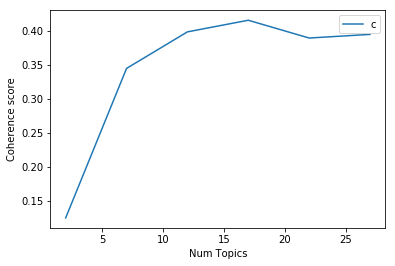

In [16]:

x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [17]:
#Setting the number of Categories to the maximum coherence value obtained 
n_categ = no_topics[np.argmax(coherence_values)]
n_categ

17

In [18]:
#Creating the model
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=n_categ, id2word=id2word)


#Getting the keywords and respective importance of each keyword in the category
result=(ldamallet.show_topics(num_topics=n_categ, num_words=200, formatted=False))

#Computing Coherence Score (The Higher the value, the better the Topics Generated)
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=df1, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


#Creating a list of Keywords for each category
categ = []
for i in range(n_categ):
    categ.append(list(dict(result[i][1]).keys()))


Coherence Score:  0.39538246768068475


### Find out the importance of each category in a sentence/news using Naive Bayes

In [19]:
text = ' '.join(sent for sent in data)

In [20]:
#Define the Vocabulary of the Overall Dataset
vocab_overall = dict()
for word in text.split():
    vocab_overall[word] = vocab_overall.get(word,0)+1

    
#Calculate Number of Words in each Category   
length = []
for i in range(n_categ):
    length.append(len(categ[i]))   

    
#Calculate LogPriors of each Category    
logprior = []
for i in range(n_categ):
    logprior.append(np.log(length[i]/len(text)))
    

#Define the Vocabulary of each Category    
vocab = []
for i in range(n_categ):
    a = dict()
    for word in categ[i]:
        a[word] = a.get(word,0)+1
    vocab.append(a)
    

#Calculate LogLikelihoods of each Category     
loglike = []
for i in range(n_categ):
    a = dict()
    denom = 0
    for key in vocab_overall.keys():
        denom = denom + (vocab[i].get(key,0)+1)
    for key in vocab_overall.keys():
        a[key] = np.log((vocab[i].get(key,0)+1)/denom)
    loglike.append(a)


# Creating the News part of the Final Dataset

In [21]:
final_result = []

for test in np.array(df):
    
    
    
    #Combining Headline and Alternate Headline
    text = np.array([(test[1] + test[2])])
    
    #Cleaning the text and splitting it
    a = text_cleaning(text,stopwords)[0][0].split()
    
    #Setting the Default value of Loglikelihood values to LogPrior calculated before
    result = pd.DataFrame(logprior+[test[0]])
    
    #Finding the Loglikelihood for each category
    for i in range(n_categ):
        #print(i)
        for word in a:
            result[0][i] += loglike[i].get(word,0)
    
    final_result.append(result[0])
    

In [22]:
final_result = np.array(final_result)

df = []

for day in list(set(final_result[:,(final_result.shape[1]-1)])):
    
    #print(day)
    
    x = []
    
    for i in range(final_result.shape[0]):
        if(final_result[i,final_result.shape[1]-1] == day):
            x.append((list(final_result[i,0:(final_result.shape[1]-1)])))
    
    
    x = np.array(x)
    
    
    for i in range(x.shape[0]):
        df.append([np.argmax(np.array(x[i,0:(final_result.shape[1]-1)])),day])


In [23]:
df = pd.DataFrame(df)

In [24]:
from keras.utils import to_categorical

C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
encoded = to_categorical(df.iloc[:,0])

In [26]:
xyz = pd.concat((pd.DataFrame(encoded),df.iloc[:,1]),axis=1)
xyz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019-06-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019-06-01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-06-01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019-06-01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-15
28633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-15
28634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-15
28635,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-15


In [27]:
z = []

for day in list(set(xyz.iloc[:,-1])):
    
    #print(z)
    
    s = list(xyz.iloc[:,0:xyz.shape[1]-1][xyz.iloc[:,xyz.shape[1]-1]==day].sum(axis=0)/xyz.shape[0])
    
    #s = list(xyz.iloc[:,0:xyz.shape[1]-1][xyz.iloc[:,xyz.shape[1]-1]==day].sum(axis=0))
    
    s.append(day)
    
    z.append(s)

In [28]:
z = pd.DataFrame(z)
z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000035,0.000314,0.000140,0.000070,0.000070,0.000140,0.000140,0.000210,0.000140,0.000140,0.000210,0.000105,0.000105,0.000000,0.000140,0.000000,0.000559,2019-06-01
1,0.000070,0.000070,0.000140,0.000175,0.000035,0.000070,0.000314,0.000175,0.000175,0.000000,0.000210,0.000070,0.000105,0.000070,0.000175,0.000210,0.000140,2020-01-06
2,0.000070,0.000175,0.000105,0.000070,0.000000,0.000105,0.000070,0.000070,0.000035,0.000035,0.000105,0.000105,0.000070,0.000070,0.000140,0.000210,0.000210,2019-12-29
3,0.000035,0.000140,0.000000,0.000070,0.000210,0.000035,0.000070,0.000000,0.000140,0.000140,0.000105,0.000000,0.000244,0.000035,0.000140,0.000105,0.000175,2019-12-15
4,0.000140,0.000035,0.000244,0.000070,0.000105,0.000105,0.000140,0.000140,0.000105,0.000244,0.000105,0.000105,0.000175,0.000070,0.000035,0.000070,0.000244,2019-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.000140,0.000070,0.000105,0.000105,0.000070,0.000000,0.000070,0.000175,0.000070,0.000070,0.000140,0.000175,0.000000,0.000175,0.000105,0.000210,2019-04-21
395,0.000140,0.000070,0.000279,0.000105,0.000070,0.000105,0.000035,0.000105,0.000035,0.000070,0.000314,0.000244,0.000175,0.000105,0.000000,0.000140,0.000140,2019-07-31
396,0.000175,0.000105,0.000035,0.000070,0.000105,0.000105,0.000105,0.000000,0.000035,0.000105,0.000070,0.000105,0.000210,0.000035,0.000035,0.000105,0.000489,2019-04-14
397,0.000070,0.000035,0.000175,0.000070,0.000035,0.000035,0.000175,0.000070,0.000210,0.000210,0.000035,0.000035,0.000175,0.000000,0.000070,0.000035,0.000070,2019-09-15


In [29]:
pd.DataFrame.to_csv(z,'news_categ.csv')